https://hira03.hatenablog.com/entry/KNeighborsRegressor

In [3]:
!pip install mglearn

     |████████████████████████████████| 542kB 3.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=76e777cf8a140c7ad95f8c709c50e0beeb210aa62692ca68bafbcc4cb11786db
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [4]:
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_wave(n_samples = 40)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
rgs = KNeighborsRegressor(n_neighbors=3)
rgs.fit(X_train, y_train)
round(rgs.score(X_test, y_test), 3)

0.834

In [6]:
rgs_10 = KNeighborsRegressor(n_neighbors=10)
rgs_10.fit(X_train, y_train)
round(rgs.score(X_test, y_test), 3)

0.834

In [8]:
list_k = []
list_test_accuaracy = []
list_training_accuaracy = []
list_pred = []

for k in range(1, 21):
  rgs = KNeighborsRegressor(n_neighbors=k)
  rgs.fit(X_train, y_train)

  y_pred = rgs.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
  test_accuaracy = rgs.score(X_test, y_test)
  training_accuaracy = rgs.score(X_train, y_train)

  print("[%d] MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (k, mae, rmse, test_accuaracy))

  list_k.append(k)
  list_test_accuaracy.append(test_accuaracy)
  list_training_accuaracy.append(training_accuaracy)
  list_pred.append(y_pred)

[1] MAE = 0.58,  RMSE = 0.65,  score = 0.35
[2] MAE = 0.35,  RMSE = 0.48,  score = 0.66
[3] MAE = 0.25,  RMSE = 0.33,  score = 0.83
[4] MAE = 0.30,  RMSE = 0.39,  score = 0.77
[5] MAE = 0.36,  RMSE = 0.44,  score = 0.71
[6] MAE = 0.38,  RMSE = 0.45,  score = 0.70
[7] MAE = 0.38,  RMSE = 0.46,  score = 0.68
[8] MAE = 0.37,  RMSE = 0.46,  score = 0.68
[9] MAE = 0.37,  RMSE = 0.48,  score = 0.65
[10] MAE = 0.33,  RMSE = 0.49,  score = 0.64
[11] MAE = 0.30,  RMSE = 0.44,  score = 0.70
[12] MAE = 0.30,  RMSE = 0.45,  score = 0.69
[13] MAE = 0.29,  RMSE = 0.45,  score = 0.69
[14] MAE = 0.28,  RMSE = 0.46,  score = 0.68
[15] MAE = 0.29,  RMSE = 0.44,  score = 0.71
[16] MAE = 0.30,  RMSE = 0.44,  score = 0.71
[17] MAE = 0.33,  RMSE = 0.46,  score = 0.68
[18] MAE = 0.34,  RMSE = 0.47,  score = 0.66
[19] MAE = 0.36,  RMSE = 0.48,  score = 0.65
[20] MAE = 0.38,  RMSE = 0.48,  score = 0.64


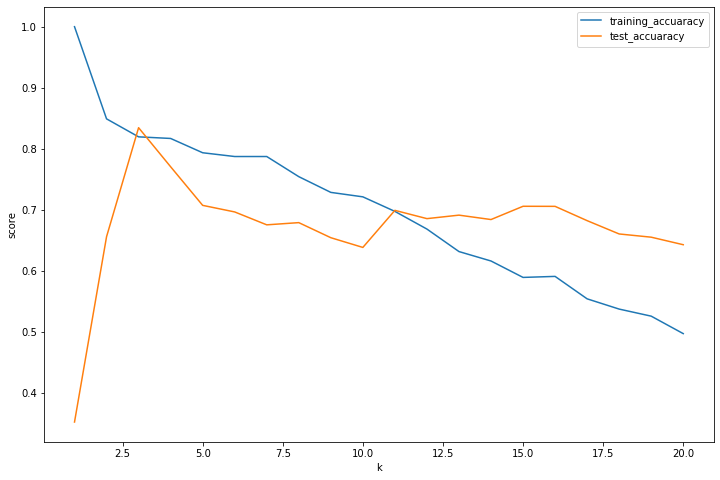

In [9]:
fig, axes = plt.subplots(figsize = (12, 8))
plt.xlabel("k")
plt.ylabel("score")
plt.plot(list_k, list_training_accuaracy, label='training_accuaracy')
plt.plot(list_k, list_test_accuaracy, label='test_accuaracy')
plt.legend()
plt.show()

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
boston.data[:,[5]]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [20]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
X_train, X_test, y_train, y_test = train_test_split(boston.data[:, [5]], boston.target, random_state = 0)
rgs = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)
round(rgs.score(X_test, y_test), 3)

0.469

In [12]:
list_k = []
list_test_accuaracy = []
list_training_accuaracy = []
list_pred = []

for k in range(1, 21):
  rgs = KNeighborsRegressor(n_neighbors=k)
  rgs.fit(X_train, y_train)

  y_pred = rgs.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
  test_accuaracy = rgs.score(X_test, y_test)
  training_accuaracy = rgs.score(X_train, y_train)

  print("[%d] MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (k, mae, rmse, test_accuaracy))

  list_k.append(k)
  list_test_accuaracy.append(test_accuaracy)
  list_training_accuaracy.append(training_accuaracy)
  list_pred.append(y_pred)

[1] MAE = 6.14,  RMSE = 8.72,  score = 0.07
[2] MAE = 4.76,  RMSE = 6.88,  score = 0.42
[3] MAE = 4.56,  RMSE = 6.59,  score = 0.47
[4] MAE = 4.53,  RMSE = 6.46,  score = 0.49
[5] MAE = 4.30,  RMSE = 6.28,  score = 0.52
[6] MAE = 4.27,  RMSE = 6.18,  score = 0.53
[7] MAE = 4.30,  RMSE = 6.16,  score = 0.53
[8] MAE = 4.33,  RMSE = 6.23,  score = 0.52
[9] MAE = 4.33,  RMSE = 6.22,  score = 0.53
[10] MAE = 4.31,  RMSE = 6.20,  score = 0.53
[11] MAE = 4.31,  RMSE = 6.18,  score = 0.53
[12] MAE = 4.25,  RMSE = 6.16,  score = 0.54
[13] MAE = 4.30,  RMSE = 6.19,  score = 0.53
[14] MAE = 4.22,  RMSE = 6.13,  score = 0.54
[15] MAE = 4.21,  RMSE = 6.14,  score = 0.54
[16] MAE = 4.22,  RMSE = 6.15,  score = 0.54
[17] MAE = 4.20,  RMSE = 6.15,  score = 0.54
[18] MAE = 4.15,  RMSE = 6.09,  score = 0.55
[19] MAE = 4.19,  RMSE = 6.14,  score = 0.54
[20] MAE = 4.23,  RMSE = 6.21,  score = 0.53


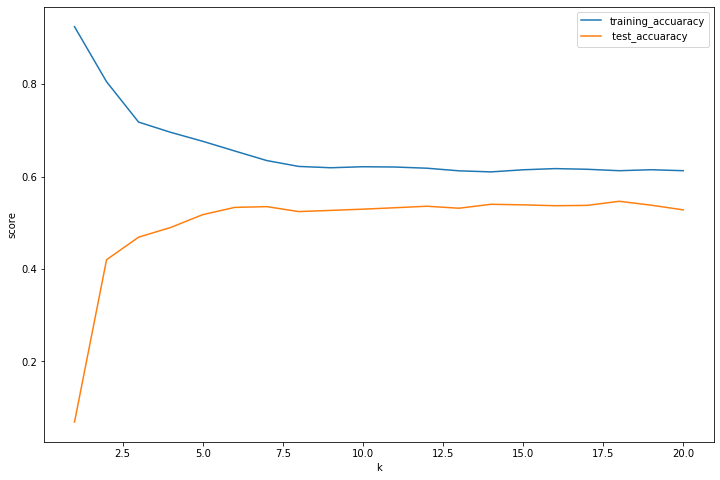

In [13]:
fig, axes = plt.subplots(figsize = (12, 8))
plt.xlabel("k")
plt.ylabel("score")
plt.plot(list_k, list_training_accuaracy, label='training_accuaracy')
plt.plot(list_k, list_test_accuaracy, label=' test_accuaracy')
plt.legend()
plt.show()

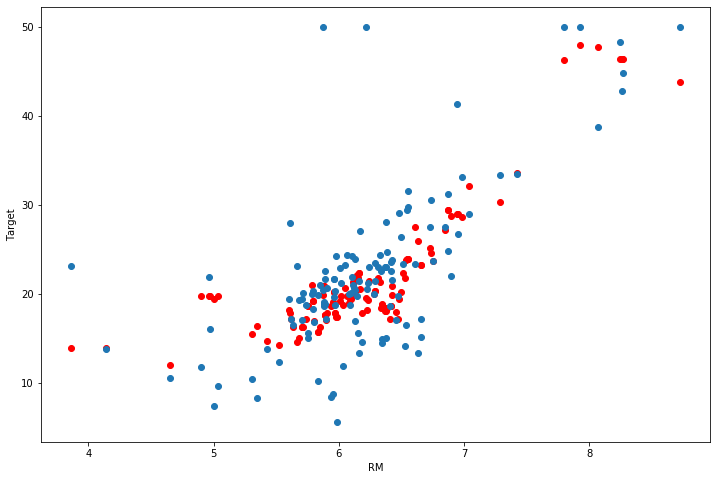

In [14]:
K6_Pred = np.array(list_pred)[5]
fig, axes = plt.subplots(figsize = (12, 8))
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, K6_Pred, "ro")
plt.plot(X_test, y_test, "o")
plt.show()